The below code is run so that libraries and functions from the previous file can be brought over to this file.

In [1]:
%run "02-Code-Part-01.ipynb"

Part 1 of the notebook has been synchronized. 
Please proceed to part 2 of the notebook. 
Thank you for your patience.


# Data Cleaning and EDA

## Import Datasets

In [2]:
#Import depression dataset
df_depress=pd.read_csv("./00-datasets/depression_data.csv")

In [3]:
#Import anxiety dataset
df_anxiety=pd.read_csv("./00-datasets/anxiety_data.csv")

## Datasets : Depression

In [4]:
#Check the shape of dataset
display(df_depress.shape)

(3077, 4)

In [5]:
display(df_depress.head())

,Unnamed: 0,subreddit,title,selftext
0,0,depression,"drunk, confused, and depressed?","I dunno, I'm posting here cuz I think I'm havi..."
1,1,depression,Question,You ever feel like something is wrong with you...
2,2,depression,Cant get homework done,I have multiple chemistry packets due tonight ...
3,3,depression,I think I would be happier if my family forgot...,"I would be free of this situation i’m in, I wo..."
4,4,depression,Anybody reading this that wants a hug,[removed]


In [6]:
#Check for duplicates
display(df_depress.duplicated().sum())

0

In [7]:
#Check dataset info
display(df_depress.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3077 non-null   int64 
 1   subreddit   3077 non-null   object
 2   title       3077 non-null   object
 3   selftext    3056 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.3+ KB


None

In [8]:
inconsist_uni_val(df_depress)

'title'

:(                                                               6
Help                                                             6
I need help                                                      5
I don’t know what to do                                          5
Empty                                                            4
                                                                ..
Terrified of getting my drivers license                          1
Is this depression or loneliness? Or both?                       1
Being near death felt peaceful, I can't get over the feeling.    1
I don’t want to kill myself                                      1
A quote                                                          1
Name: title, Length: 3005, dtype: int64

'selftext'

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   516
[deleted]                                                               

In [9]:
#remove rows where titles the title consist of Nan
df_depress=df_depress.dropna()
display(df_depress.shape)

(3056, 4)

In [10]:
#remove rows where titles the title consist of deleted,removed,Nan and Empty

#define list of values
values = ["[removed]","[deleted]","Empty"]

df_depress=df_depress[(df_depress.title.isin(values)==False) & (df_depress.selftext.isin(values)==False)]
display(df_depress)
display(df_depress.shape)

,Unnamed: 0,subreddit,title,selftext
0,0,depression,"drunk, confused, and depressed?","I dunno, I'm posting here cuz I think I'm havi..."
1,1,depression,Question,You ever feel like something is wrong with you...
2,2,depression,Cant get homework done,I have multiple chemistry packets due tonight ...
3,3,depression,I think I would be happier if my family forgot...,"I would be free of this situation i’m in, I wo..."
6,6,depression,Sleeping too much. Advice?,"Background: Been diagnosed with depression, an..."
...,...,...,...,...
3072,3072,depression,How can I make myself believe in myself?,My whole life I've felt stupid and not good en...
3073,3073,depression,Just alone in the quarantine,I just wanted to let it out. I have been on me...
3074,3074,depression,Moving too fast/still sorta wanting death?,"I’ve had past experiences with depression, I w..."
3075,3075,depression,I need help,It’s pretty comforting to read some of the thr...


(2490, 4)

In [11]:
#Assuming there is numbers in the list, we convert all the objects to str in the list and at the same time, replace","
#with " "

df_depress['selftext_clean']=df_depress['selftext'].astype(str).str.replace(',','')
df_depress['title_clean']=df_depress['title'].astype(str).str.replace(',','')


#assuming there is punctation in the list, we use the function to remove punctation.
df_depress['text_n_stopwords'] = df_depress['selftext_clean'].apply(lambda x: remove_punct(x))
df_depress['title_n_stopwords'] = df_depress['title_clean'].apply(lambda x: remove_punct(x))

#Create stopwords
stopwords = nltk.corpus.stopwords.words('english')

#Lemmatize
lemmatizer = WordNetLemmatizer()
wn = nltk.WordNetLemmatizer()

df_depress['text_lemmatizing'] = df_depress['selftext_clean'].apply(lambda x: lemmatizing(x))
df_depress['title_lemmatizing'] = df_depress['title_clean'].apply(lambda x: lemmatizing(x))

#show results
df_depress.head()

,Unnamed: 0,subreddit,title,selftext,selftext_clean,title_clean,text_n_stopwords,title_n_stopwords,text_lemmatizing,title_lemmatizing
0,0,depression,"drunk, confused, and depressed?","I dunno, I'm posting here cuz I think I'm havi...",I dunno I'm posting here cuz I think I'm havin...,drunk confused and depressed?,i dunno im posting here cuz i think im having ...,drunk confused and depressed,I dunno I posting cuz I think I episode hard t...,drunk confused depressed
1,1,depression,Question,You ever feel like something is wrong with you...,You ever feel like something is wrong with you...,Question,you ever feel like something is wrong with you...,question,You ever feel like something wrong everyday ma...,Question
2,2,depression,Cant get homework done,I have multiple chemistry packets due tonight ...,I have multiple chemistry packets due tonight ...,Cant get homework done,i have multiple chemistry packets due tonight ...,cant get homework done,I multiple chemistry packet due tonight test g...,Cant get homework done
3,3,depression,I think I would be happier if my family forgot...,"I would be free of this situation i’m in, I wo...",I would be free of this situation i’m in I wou...,I think I would be happier if my family forgot...,i would be free of this situation i’m in i wou...,i think i would be happier if my family forgot...,I would free situation I would free manipulati...,I think I would happier family forgot
6,6,depression,Sleeping too much. Advice?,"Background: Been diagnosed with depression, an...",Background: Been diagnosed with depression anx...,Sleeping too much. Advice?,background been diagnosed with depression anxi...,sleeping too much advice,Background Been diagnosed depression anxiety d...,Sleeping much Advice


In [12]:
#Remove columns that is not required and combine it together

#Combined the 2 columns together.
df_depress["title+selftext_all_clean"]=df_depress["title_clean"] + df_depress["selftext_clean"]
df_depress["title+selftext_n_stopwords"]=df_depress["title_n_stopwords"] + df_depress["text_n_stopwords"]
df_depress["title+selftext_lemmatizing"]=df_depress["title_lemmatizing"] + df_depress["text_lemmatizing"]

#Show results
display(df_depress)
display(type(df_depress.head()))

,Unnamed: 0,subreddit,title,selftext,selftext_clean,title_clean,text_n_stopwords,title_n_stopwords,text_lemmatizing,title_lemmatizing,title+selftext_all_clean,title+selftext_n_stopwords,title+selftext_lemmatizing
0,0,depression,"drunk, confused, and depressed?","I dunno, I'm posting here cuz I think I'm havi...",I dunno I'm posting here cuz I think I'm havin...,drunk confused and depressed?,i dunno im posting here cuz i think im having ...,drunk confused and depressed,I dunno I posting cuz I think I episode hard t...,drunk confused depressed,drunk confused and depressed?I dunno I'm posti...,drunk confused and depressedi dunno im posting...,drunk confused depressed I dunno I posting cuz...
1,1,depression,Question,You ever feel like something is wrong with you...,You ever feel like something is wrong with you...,Question,you ever feel like something is wrong with you...,question,You ever feel like something wrong everyday ma...,Question,QuestionYou ever feel like something is wrong ...,questionyou ever feel like something is wrong ...,QuestionYou ever feel like something wrong eve...
2,2,depression,Cant get homework done,I have multiple chemistry packets due tonight ...,I have multiple chemistry packets due tonight ...,Cant get homework done,i have multiple chemistry packets due tonight ...,cant get homework done,I multiple chemistry packet due tonight test g...,Cant get homework done,Cant get homework doneI have multiple chemistr...,cant get homework donei have multiple chemistr...,Cant get homework doneI multiple chemistry pac...
3,3,depression,I think I would be happier if my family forgot...,"I would be free of this situation i’m in, I wo...",I would be free of this situation i’m in I wou...,I think I would be happier if my family forgot...,i would be free of this situation i’m in i wou...,i think i would be happier if my family forgot...,I would free situation I would free manipulati...,I think I would happier family forgot,I think I would be happier if my family forgot...,i think i would be happier if my family forgot...,I think I would happier family forgotI would f...
6,6,depression,Sleeping too much. Advice?,"Background: Been diagnosed with depression, an...",Background: Been diagnosed with depression anx...,Sleeping too much. Advice?,background been diagnosed with depression anxi...,sleeping too much advice,Background Been diagnosed depression anxiety d...,Sleeping much Advice,Sleeping too much. Advice?Background: Been dia...,sleeping too much advicebackground been diagno...,Sleeping much Advice Background Been diagnosed...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,3072,depression,How can I make myself believe in myself?,My whole life I've felt stupid and not good en...,My whole life I've felt stupid and not good en...,How can I make myself believe in myself?,my whole life ive felt stupid and not good eno...,how can i make myself believe in myself,My whole life I felt stupid good enough I try ...,How I make believe,How can I make myself believe in myself?My who...,how can i make myself believe in myselfmy whol...,How I make believe My whole life I felt stupid...
3073,3073,depression,Just alone in the quarantine,I just wanted to let it out. I have been on me...,I just wanted to let it out. I have been on me...,Just alone in the quarantine,i just wanted to let it out i have been on med...,just alone in the quarantine,I wanted let I med I would probably killed alr...,Just alone quarantine,Just alone in the quarantineI just wanted to l...,just alone in the quarantinei just wanted to l...,Just alone quarantineI wanted let I med I woul...
3074,3074,depression,Moving too fast/still sorta wanting death?,"I’ve had past experiences with depression, I w...",I’ve had past experiences with depression I wa...,Moving too fast/still sorta wanting death?,i’ve had past experiences with depression i wa...,moving too faststill sorta wanting death,I past experience depression I suicidal one po...,Moving fast still sorta 

pandas.core.frame.DataFrame

In [13]:
#Remove unwanted col and add new col call target with 0 for depress
df_depress.drop(["Unnamed: 0",'selftext','title'],axis=1,inplace=True)
df_depress["target"]=0
display(df_depress.head())

,subreddit,selftext_clean,title_clean,text_n_stopwords,title_n_stopwords,text_lemmatizing,title_lemmatizing,title+selftext_all_clean,title+selftext_n_stopwords,title+selftext_lemmatizing,target
0,depression,I dunno I'm posting here cuz I think I'm havin...,drunk confused and depressed?,i dunno im posting here cuz i think im having ...,drunk confused and depressed,I dunno I posting cuz I think I episode hard t...,drunk confused depressed,drunk confused and depressed?I dunno I'm posti...,drunk confused and depressedi dunno im posting...,drunk confused depressed I dunno I posting cuz...,0
1,depression,You ever feel like something is wrong with you...,Question,you ever feel like something is wrong with you...,question,You ever feel like something wrong everyday ma...,Question,QuestionYou ever feel like something is wrong ...,questionyou ever feel like something is wrong ...,QuestionYou ever feel like something wrong eve...,0
2,depression,I have multiple chemistry packets due tonight ...,Cant get homework done,i have multiple chemistry packets due tonight ...,cant get homework done,I multiple chemistry packet due tonight test g...,Cant get homework done,Cant get homework doneI have multiple chemistr...,cant get homework donei have multiple chemistr...,Cant get homework doneI multiple chemistry pac...,0
3,depression,I would be free of this situation i’m in I wou...,I think I would be happier if my family forgot...,i would be free of this situation i’m in i wou...,i think i would be happier if my family forgot...,I would free situation I would free manipulati...,I think I would happier family forgot,I think I would be happier if my family forgot...,i think i would be happier if my family forgot...,I think I would happier family forgotI would f...,0
6,depression,Background: Been diagnosed with depression anx...,Sleeping too much. Advice?,background been diagnosed with depression anxi...,sleeping too much advice,Background Been diagnosed depression anxiety d...,Sleeping much Advice,Sleeping too much. Advice?Background: Been dia...,sleeping too much advicebackground been diagno...,Sleeping much Advice Background Been diagnosed...,0


#### EDA : Words and String Lengths

In [14]:
#looking at the length and in each reddit title and self text using len. use map for each row and store in a new col
df_depress["post_length"]=df_depress["selftext_clean"].map(len)
df_depress["title_length"]=df_depress["title_clean"].map(len)
df_depress["title+text_length"]=df_depress["title+selftext_all_clean"].map(len)

#display results
display(df_depress.head())

,subreddit,selftext_clean,title_clean,text_n_stopwords,title_n_stopwords,text_lemmatizing,title_lemmatizing,title+selftext_all_clean,title+selftext_n_stopwords,title+selftext_lemmatizing,target,post_length,title_length,title+text_length
0,depression,I dunno I'm posting here cuz I think I'm havin...,drunk confused and depressed?,i dunno im posting here cuz i think im having ...,drunk confused and depressed,I dunno I posting cuz I think I episode hard t...,drunk confused depressed,drunk confused and depressed?I dunno I'm posti...,drunk confused and depressedi dunno im posting...,drunk confused depressed I dunno I posting cuz...,0,585,29,614
1,depression,You ever feel like something is wrong with you...,Question,you ever feel like something is wrong with you...,question,You ever feel like something wrong everyday ma...,Question,QuestionYou ever feel like something is wrong ...,questionyou ever feel like something is wrong ...,QuestionYou ever feel like something wrong eve...,0,114,8,122
2,depression,I have multiple chemistry packets due tonight ...,Cant get homework done,i have multiple chemistry packets due tonight ...,cant get homework done,I multiple chemistry packet due tonight test g...,Cant get homework done,Cant get homework doneI have multiple chemistr...,cant get homework donei have multiple chemistr...,Cant get homework doneI multiple chemistry pac...,0,452,22,474
3,depression,I would be free of this situation i’m in I wou...,I think I would be happier if my family forgot...,i would be free of this situation i’m in i wou...,i think i would be happier if my family forgot...,I would free situation I would free manipulati...,I think I would happier family forgot,I think I would be happier if my family forgot...,i think i would be happier if my family forgot...,I think I would happier family forgotI would f...,0,462,55,517
6,depression,Background: Been diagnosed with depression anx...,Sleeping too much. Advice?,background been diagnosed with depression anxi...,sleeping too much advice,Background Been diagnosed depression anxiety d...,Sleeping much Advice,Sleeping too much. Advice?Background: Been dia...,sleeping too much advicebackground been diagno...,Sleeping much Advice Background Been diagnosed...,0,941,26,967


In [15]:
#look at the words count in each reddit title and self text and store it in a new column
df_depress["post_words_count"]=df_depress["selftext_clean"].map(lambda x: len(x.split()))
df_depress["title_words_count"]=df_depress["title_clean"].map(lambda x: len(x.split()))
df_depress["title+post_words_count"]=df_depress["title+selftext_all_clean"].map(lambda x: len(x.split()))

#check results
display(df_depress.head(5))

,subreddit,selftext_clean,title_clean,text_n_stopwords,title_n_stopwords,text_lemmatizing,title_lemmatizing,title+selftext_all_clean,title+selftext_n_stopwords,title+selftext_lemmatizing,target,post_length,title_length,title+text_length,post_words_count,title_words_count,title+post_words_count
0,depression,I dunno I'm posting here cuz I think I'm havin...,drunk confused and depressed?,i dunno im posting here cuz i think im having ...,drunk confused and depressed,I dunno I posting cuz I think I episode hard t...,drunk confused depressed,drunk confused and depressed?I dunno I'm posti...,drunk confused and depressedi dunno im posting...,drunk confused depressed I dunno I posting cuz...,0,585,29,614,113,4,116
1,depression,You ever feel like something is wrong with you...,Question,you ever feel like something is wrong with you...,question,You ever feel like something wrong everyday ma...,Question,QuestionYou ever feel like something is wrong ...,questionyou ever feel like something is wrong ...,QuestionYou ever feel like something wrong eve...,0,114,8,122,23,1,23
2,depression,I have multiple chemistry packets due tonight ...,Cant get homework done,i have multiple chemistry packets due tonight ...,cant get homework done,I multiple chemistry packet due tonight test g...,Cant get homework done,Cant get homework doneI have multiple chemistr...,cant get homework donei have multiple chemistr...,Cant get homework doneI multiple chemistry pac...,0,452,22,474,84,4,87
3,depression,I would be free of this situation i’m in I wou...,I think I would be happier if my family forgot...,i would be free of this situation i’m in i wou...,i think i would be happier if my family forgot...,I would free situation I would free manipulati...,I think I would happier family forgot,I think I would be happier if my family forgot...,i think i would be happier if my family forgot...,I think I would happier family forgotI would f...,0,462,55,517,96,12,107
6,depression,Background: Been diagnosed with depression anx...,Sleeping too much. Advice?,background been diagnosed with depression anxi...,sleeping too much advice,Background Been diagnosed depression anxiety d...,Sleeping much Advice,Sleeping too much. Advice?Background: Been dia...,sleeping too much advicebackground been diagno...,Sleeping much Advice Background Been diagnosed...,0,941,26,967,180,4,183


#### Word count

In [16]:
#look at the shortest and longest words counts with the "title+selftext_lemmatizing"

#Shortest word count
display(df_depress.sort_values(by="title+post_words_count",ascending=True)[["title+selftext_lemmatizing"]].head(5))

#Longest word count
display(df_depress.sort_values(by="title+post_words_count",ascending=False)[["title+selftext_lemmatizing"]].head(5))

,title+selftext_lemmatizing
2069,I tiredGood night
1740,NewStruggling like everyone
1544,PassionlessI feel passionless
159,CheatMy girlfriend cheated
1203,Drunk sad Let talk


,title+selftext_lemmatizing
1734,A problem lead attempt suicide twice kinda get...
2288,24F I feeling suicidal long I know ever stopE...
2519,Why insisted I stay alive Trigger warning I gu...
2147,Needing help determine action plan I good bull...
1810,I DepressedAnd way around I felt way long time...


This is to give a overview of the shortest and longest words. It is observed that the depressed people wants to have a conversation to talk about their troubles.

<AxesSubplot:title={'center':'Depression Dataset : Distribution of Title + Post words count'}, xlabel='title+post_words_count'>

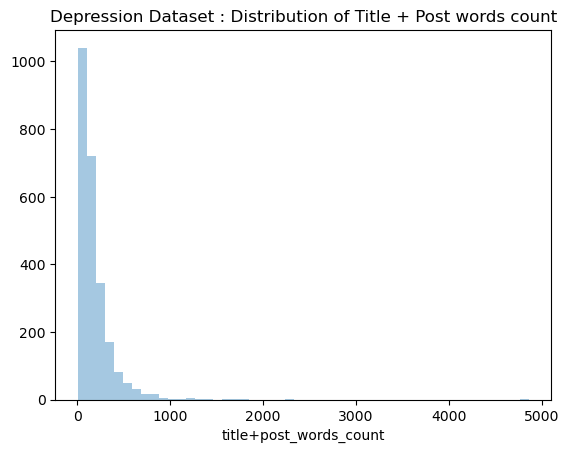

In [17]:
#Distribution of the post length
plt.title('Depression Dataset : Distribution of Title + Post words count')
sns.distplot(df_depress["title+post_words_count"],kde=False)

It is observed that the plot is right-skewed distribution. It might be from the [start-up effects.](https://www.itl.nist.gov/div898/handbook/eda/section3/histogr6.htm)

In [18]:
#look at the shortest and longest length counts with the "title+selftext_lemmatizing"

#Shortest length
display(df_depress.sort_values(by="title+text_length",ascending=True)[["title+selftext_lemmatizing"]].head(5))

#Longest length
display(df_depress.sort_values(by="title+text_length",ascending=False)[["title+selftext_lemmatizing"]].head(5))

,title+selftext_lemmatizing
2069,I tiredGood night
1203,Drunk sad Let talk
1740,NewStruggling like everyone
159,CheatMy girlfriend cheated
2264,I wanna wake anymore


,title+selftext_lemmatizing
1734,A problem lead attempt suicide twice kinda get...
2288,24F I feeling suicidal long I know ever stopE...
2519,Why insisted I stay alive Trigger warning I gu...
2147,Needing help determine action plan I good bull...
1810,I DepressedAnd way around I felt way long time...


This is to give a overview of the shortest and longest words. It is observed that the title+text_length and title+post_words_count are closely similar. 

<AxesSubplot:title={'center':'Depression Dataset : Distribution of Post Length'}, xlabel='title+text_length'>

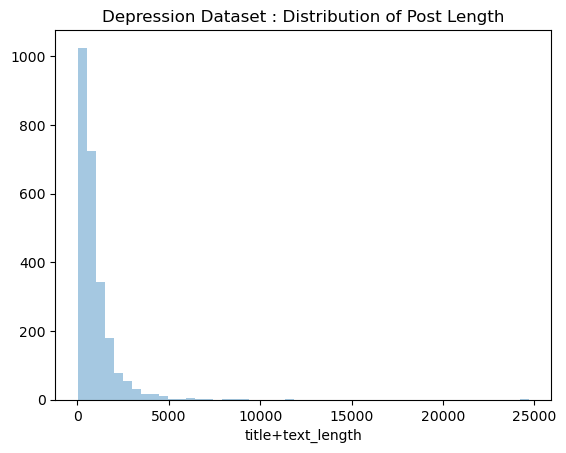

In [19]:
#Distribution of the post length
plt.title('Depression Dataset : Distribution of Post Length')
sns.distplot(df_depress["title+text_length"],kde=False)

It is observed that the plot is right-skewed distribution. It might be from the [start-up effects.](https://www.itl.nist.gov/div898/handbook/eda/section3/histogr6.htm)

In [20]:
cv = CountVectorizer(stop_words=stopwords, min_df=3)
cv.fit(df_depress["title+selftext_lemmatizing"])

status_cv = cv.transform(df_depress["title+selftext_lemmatizing"])
status_df = pd.DataFrame(status_cv.todense(), columns=cv.get_feature_names())

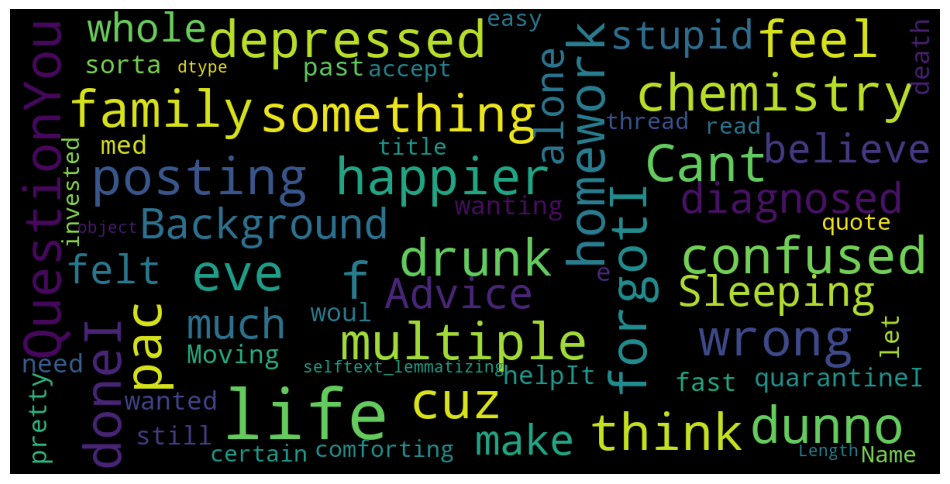

In [21]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
        background_color="black",
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

wordcloud=wordcloud.generate(str(df_depress["title+selftext_lemmatizing"]))
    
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [22]:
#show 5 most common words
status_df.sum().sort_values(ascending=False).head(5)

feel    3282
like    3246
want    2251
know    2116
life    2034
dtype: int64

<AxesSubplot:title={'center':'Depression Dataset : Top 5 common 1-word'}>

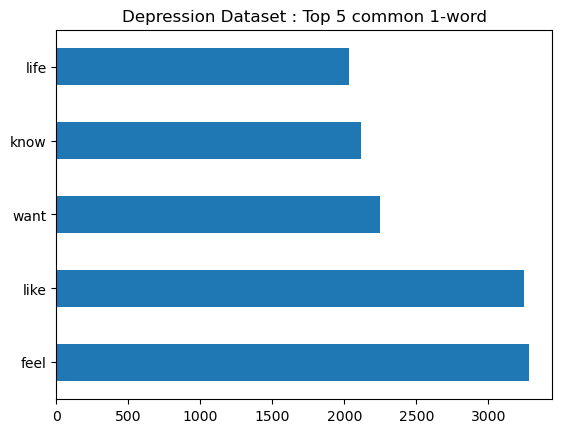

In [23]:
#show in bar chart form
plt.title('Depression Dataset : Top 5 common 1-word')
status_df.sum().sort_values(ascending=False).head(5).plot(kind='barh')

It is observed that the 20 most common words makes no sense.

In [24]:
#show bigrams
cv_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv_bigrams.fit(df_depress["title+selftext_lemmatizing"])

bigrams_cv = cv_bigrams.transform(df_depress["title+selftext_lemmatizing"])
bigrams_df = pd.DataFrame(bigrams_cv.todense(), columns=cv_bigrams.get_feature_names())

bigrams_df.sum().sort_values(ascending=False).head(5)

feel like        1243
make feel         203
mental health     136
high school       117
year old          109
dtype: int64

<AxesSubplot:title={'center':'Depression Dataset : Top 5 common 2-word'}>

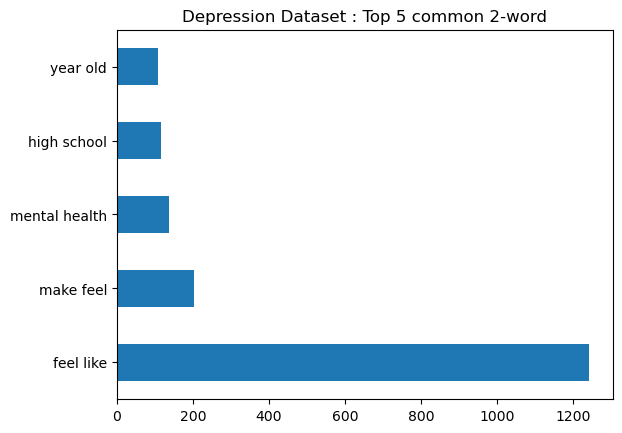

In [25]:
#show in bigrams bar chart form
plt.title('Depression Dataset : Top 5 common 2-word')
bigrams_df.sum().sort_values(ascending=False).head(5).plot(kind='barh')

It is observed that most depressed people wants to communicate on how they feel on the reddit.

In [26]:
#show trigrams
cv_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english')
cv_trigrams.fit(df_depress['title+selftext_n_stopwords'])

trigrams_cv = cv_trigrams.transform(df_depress['title+selftext_n_stopwords'])
trigrams_df = pd.DataFrame(trigrams_cv.todense(), columns=cv_trigrams.get_feature_names())

trigrams_df.sum().sort_values(ascending=False).head(5)

feel like im        105
just feel like       69
dont know im         54
don feel like        41
don know anymore     40
dtype: int64

<AxesSubplot:title={'center':'Depression Dataset : Top 5 common 3-word'}>

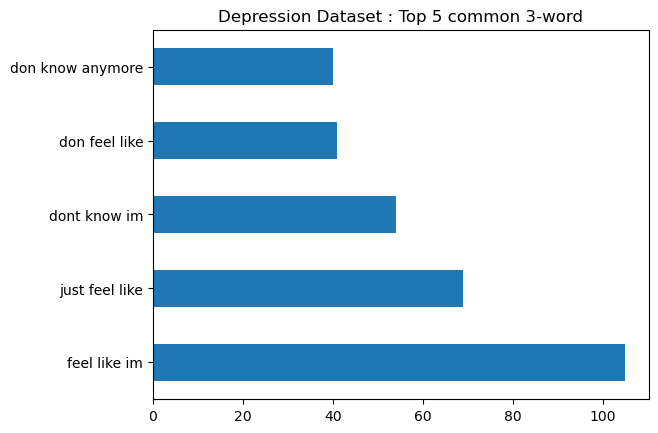

In [27]:
#show in trigrams bar chart form
plt.title('Depression Dataset : Top 5 common 3-word')
trigrams_df.sum().sort_values(ascending=False).head(5).plot(kind='barh')

Similar to the point made above, it is observed that alot of depressed people wants to communicate on how they feel on the reddit. There is a possiblu that they want someone to have a [listening ear.](https://dailyburn.com/life/lifestyle/depression-awareness-month-help/)

## Datsets : Anxiety

In [28]:
#Import anxiety dataset
df_anxiety=pd.read_csv("./00-datasets/anxiety_data.csv")

In [29]:
#Check the shape of dataset
display(df_anxiety.shape)

(3083, 4)

In [30]:
display(df_anxiety.head())

,Unnamed: 0,subreddit,title,selftext
0,0,Anxiety,Everyone always says I stress and worry too mu...,They do not try and make me feel bad but when ...
1,1,Anxiety,Firsts,On a date with myself today. Not going to let ...
2,2,Anxiety,not missing my friends anymore,i’m away at college and i’ve realized that i d...
3,3,Anxiety,instigate fear?,Do any of you also instigate your fear? I tell...
4,4,Anxiety,just realized i am deathly afraid of total dar...,i was playing on my oculus and then the power ...


In [31]:
#Check for duplicates
display(df_anxiety.duplicated().sum())

0

In [32]:
#Check dataset info
display(df_anxiety.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3083 non-null   int64 
 1   subreddit   3083 non-null   object
 2   title       3083 non-null   object
 3   selftext    2951 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.5+ KB


None

In [33]:
inconsist_uni_val(df_anxiety)

'title'

Is this anxiety?                                                      6
Anxiety                                                               5
Health anxiety                                                        4
Help                                                                  4
Morning anxiety                                                       3
                                                                     ..
Constant sleepiness                                                   1
Venus Retrograde                                                      1
Leg pain, tingling, spasms:(                                          1
Tired (just getting things off my chest)                              1
Im a little nervous if I have brain cancer (it sounds dumb I know)    1
Name: title, Length: 3040, dtype: int64

'selftext'

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [34]:
#ref: https://www.adamsmith.haus/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python
#remove rows where titles the title consist of Nan
df_anxiety=df_anxiety.dropna()
display(df_anxiety.shape)

(2951, 4)

In [35]:
#remove rows where titles the title consist of deleted,removed,Nan and Empty
#https://www.statology.org/pandas-drop-rows-with-value/
#define list of values
values = ["[removed]","[deleted]"]

#df[df.column_name.isin(values) == False]
df_anxiety=df_anxiety[(df_anxiety.title.isin(values)==False) & (df_anxiety.selftext.isin(values)==False)]
display(df_anxiety.shape)

(2811, 4)

In [36]:
display(df_anxiety.head())

,Unnamed: 0,subreddit,title,selftext
0,0,Anxiety,Everyone always says I stress and worry too mu...,They do not try and make me feel bad but when ...
1,1,Anxiety,Firsts,On a date with myself today. Not going to let ...
2,2,Anxiety,not missing my friends anymore,i’m away at college and i’ve realized that i d...
3,3,Anxiety,instigate fear?,Do any of you also instigate your fear? I tell...
4,4,Anxiety,just realized i am deathly afraid of total dar...,i was playing on my oculus and then the power ...


In [37]:
#Check the shape of dataset
display(df_anxiety.shape)

(2811, 4)

In [38]:
#Assuming there is numbers in the list, we convert all the objects to str in the list and at the same time, replace","
#with " "

df_anxiety['selftext_clean']=df_anxiety['selftext'].astype(str).str.replace(',','')
df_anxiety['title_clean']=df_anxiety['title'].astype(str).str.replace(',','')

#assuming there is punctation in the list, we use the function to remove punctation.
df_anxiety['text_n_stopwords'] = df_anxiety['selftext_clean'].apply(lambda x: remove_punct(x))
df_anxiety['title_n_stopwords'] = df_anxiety['title_clean'].apply(lambda x: remove_punct(x))

#lemmatize.
df_anxiety['text_lemmatizing'] = df_anxiety['selftext_clean'].apply(lambda x: lemmatizing(x))
df_anxiety['title_lemmatizing'] = df_anxiety['title_clean'].apply(lambda x: lemmatizing(x))

#show results
df_anxiety.head()

,Unnamed: 0,subreddit,title,selftext,selftext_clean,title_clean,text_n_stopwords,title_n_stopwords,text_lemmatizing,title_lemmatizing
0,0,Anxiety,Everyone always says I stress and worry too mu...,They do not try and make me feel bad but when ...,They do not try and make me feel bad but when ...,Everyone always says I stress and worry too mu...,they do not try and make me feel bad but when ...,everyone always says i stress and worry too mu...,They try make feel bad someone say hunny stres...,Everyone always say I stress worry much Do und...
1,1,Anxiety,Firsts,On a date with myself today. Not going to let ...,On a date with myself today. Not going to let ...,Firsts,on a date with myself today not going to let a...,firsts,On date today Not going let anxiety better I g...,Firsts
2,2,Anxiety,not missing my friends anymore,i’m away at college and i’ve realized that i d...,i’m away at college and i’ve realized that i d...,not missing my friends anymore,i’m away at college and i’ve realized that i d...,not missing my friends anymore,m away college ve realized don t miss friend b...,missing friend anymore
3,3,Anxiety,instigate fear?,Do any of you also instigate your fear? I tell...,Do any of you also instigate your fear? I tell...,instigate fear?,do any of you also instigate your fear i tell ...,instigate fear,Do instigate fear I tell I m going sick time i...,instigate fear
4,4,Anxiety,just realized i am deathly afraid of total dar...,i was playing on my oculus and then the power ...,i was playing on my oculus and then the power ...,just realized i am deathly afraid of total dar...,i was playing on my oculus and then the power ...,just realized i am deathly afraid of total dar...,playing oculus power went longer storming ligh...,realized deathly afraid total darkness


In [39]:
#Remove columns that is not required and combine it together

#Combined the 2 columns together.
df_anxiety["title+selftext_all_clean"]=df_anxiety["title_clean"] + df_anxiety["selftext_clean"]
df_anxiety["title+selftext_n_stopwords"]=df_anxiety["title_n_stopwords"] + df_anxiety["text_n_stopwords"]
df_anxiety["title+selftext_lemmatizing"]=df_anxiety["title_lemmatizing"] + df_depress["text_lemmatizing"]

#Show results
display(df_anxiety.head(5))
display(type(df_anxiety))

,Unnamed: 0,subreddit,title,selftext,selftext_clean,title_clean,text_n_stopwords,title_n_stopwords,text_lemmatizing,title_lemmatizing,title+selftext_all_clean,title+selftext_n_stopwords,title+selftext_lemmatizing
0,0,Anxiety,Everyone always says I stress and worry too mu...,They do not try and make me feel bad but when ...,They do not try and make me feel bad but when ...,Everyone always says I stress and worry too mu...,they do not try and make me feel bad but when ...,everyone always says i stress and worry too mu...,They try make feel bad someone say hunny stres...,Everyone always say I stress worry much Do und...,Everyone always says I stress and worry too mu...,everyone always says i stress and worry too mu...,Everyone always say I stress worry much Do und...
1,1,Anxiety,Firsts,On a date with myself today. Not going to let ...,On a date with myself today. Not going to let ...,Firsts,on a date with myself today not going to let a...,firsts,On date today Not going let anxiety better I g...,Firsts,FirstsOn a date with myself today. Not going t...,firstson a date with myself today not going to...,FirstsYou ever feel like something wrong every...
2,2,Anxiety,not missing my friends anymore,i’m away at college and i’ve realized that i d...,i’m away at college and i’ve realized that i d...,not missing my friends anymore,i’m away at college and i’ve realized that i d...,not missing my friends anymore,m away college ve realized don t miss friend b...,missing friend anymore,not missing my friends anymorei’m away at coll...,not missing my friends anymorei’m away at coll...,missing friend anymoreI multiple chemistry pac...
3,3,Anxiety,instigate fear?,Do any of you also instigate your fear? I tell...,Do any of you also instigate your fear? I tell...,instigate fear?,do any of you also instigate your fear i tell ...,instigate fear,Do instigate fear I tell I m going sick time i...,instigate fear,instigate fear?Do any of you also instigate yo...,instigate feardo any of you also instigate you...,instigate fear I would free situation I would ...
4,4,Anxiety,just realized i am deathly afraid of total dar...,i was playing on my oculus and then the power ...,i was playing on my oculus and then the power ...,just realized i am deathly afraid of total dar...,i was playing on my oculus and then the power ...,just realized i am deathly afraid of total dar...,playing oculus power went longer storming ligh...,realized deathly afraid total darkness,just realized i am deathly afraid of total dar...,just realized i am deathly afraid of total dar...,NaN


pandas.core.frame.DataFrame

In [40]:
#Remove unwanted col and add new col call target with 1 for anxiety
df_anxiety.drop(["Unnamed: 0",'selftext','title'],axis=1,inplace=True)
df_anxiety["target"]=1
display(df_anxiety.head(5))

,subreddit,selftext_clean,title_clean,text_n_stopwords,title_n_stopwords,text_lemmatizing,title_lemmatizing,title+selftext_all_clean,title+selftext_n_stopwords,title+selftext_lemmatizing,target
0,Anxiety,They do not try and make me feel bad but when ...,Everyone always says I stress and worry too mu...,they do not try and make me feel bad but when ...,everyone always says i stress and worry too mu...,They try make feel bad someone say hunny stres...,Everyone always say I stress worry much Do und...,Everyone always says I stress and worry too mu...,everyone always says i stress and worry too mu...,Everyone always say I stress worry much Do und...,1
1,Anxiety,On a date with myself today. Not going to let ...,Firsts,on a date with myself today not going to let a...,firsts,On date today Not going let anxiety better I g...,Firsts,FirstsOn a date with myself today. Not going t...,firstson a date with myself today not going to...,FirstsYou ever feel like something wrong every...,1
2,Anxiety,i’m away at college and i’ve realized that i d...,not missing my friends anymore,i’m away at college and i’ve realized that i d...,not missing my friends anymore,m away college ve realized don t miss friend b...,missing friend anymore,not missing my friends anymorei’m away at coll...,not missing my friends anymorei’m away at coll...,missing friend anymoreI multiple chemistry pac...,1
3,Anxiety,Do any of you also instigate your fear? I tell...,instigate fear?,do any of you also instigate your fear i tell ...,instigate fear,Do instigate fear I tell I m going sick time i...,instigate fear,instigate fear?Do any of you also instigate yo...,instigate feardo any of you also instigate you...,instigate fear I would free situation I would ...,1
4,Anxiety,i was playing on my oculus and then the power ...,just realized i am deathly afraid of total dar...,i was playing on my oculus and then the power ...,just realized i am deathly afraid of total dar...,playing oculus power went longer storming ligh...,realized deathly afraid total darkness,just realized i am deathly afraid of total dar...,just realized i am deathly afraid of total dar...,NaN,1


#### EDA

In [41]:
#looking at the length and in each reddit title and self text using len. use map for each row and store in a new col
df_anxiety["post_length"]=df_anxiety["selftext_clean"].map(len)
df_anxiety["title_length"]=df_anxiety["title_clean"].map(len)
df_anxiety["title+text_length"]=df_anxiety["title+selftext_all_clean"].map(len)
#display results
display(df_anxiety.head(5))

,subreddit,selftext_clean,title_clean,text_n_stopwords,title_n_stopwords,text_lemmatizing,title_lemmatizing,title+selftext_all_clean,title+selftext_n_stopwords,title+selftext_lemmatizing,target,post_length,title_length,title+text_length
0,Anxiety,They do not try and make me feel bad but when ...,Everyone always says I stress and worry too mu...,they do not try and make me feel bad but when ...,everyone always says i stress and worry too mu...,They try make feel bad someone say hunny stres...,Everyone always say I stress worry much Do und...,Everyone always says I stress and worry too mu...,everyone always says i stress and worry too mu...,Everyone always say I stress worry much Do und...,1,367,100,467
1,Anxiety,On a date with myself today. Not going to let ...,Firsts,on a date with myself today not going to let a...,firsts,On date today Not going let anxiety better I g...,Firsts,FirstsOn a date with myself today. Not going t...,firstson a date with myself today not going to...,FirstsYou ever feel like something wrong every...,1,248,6,254
2,Anxiety,i’m away at college and i’ve realized that i d...,not missing my friends anymore,i’m away at college and i’ve realized that i d...,not missing my friends anymore,m away college ve realized don t miss friend b...,missing friend anymore,not missing my friends anymorei’m away at coll...,not missing my friends anymorei’m away at coll...,missing friend anymoreI multiple chemistry pac...,1,585,30,615
3,Anxiety,Do any of you also instigate your fear? I tell...,instigate fear?,do any of you also instigate your fear i tell ...,instigate fear,Do instigate fear I tell I m going sick time i...,instigate fear,instigate fear?Do any of you also instigate yo...,instigate feardo any of you also instigate you...,instigate fear I would free situation I would ...,1,111,15,126
4,Anxiety,i was playing on my oculus and then the power ...,just realized i am deathly afraid of total dar...,i was playing on my oculus and then the power ...,just realized i am deathly afraid of total dar...,playing oculus power went longer storming ligh...,realized deathly afraid total darkness,just realized i am deathly afraid of total dar...,just realized i am deathly afraid of total dar...,NaN,1,1245,51,1296


In [42]:
#look at the words count in each reddit title and self text and store it in a new column
df_anxiety["post_words_count"]=df_anxiety["selftext_clean"].map(lambda x: len(x.split()))
df_anxiety["title_words_count"]=df_anxiety["title_clean"].map(lambda x: len(x.split()))
df_anxiety["title+post_words_count"]=df_anxiety["title+selftext_all_clean"].map(lambda x: len(x.split()))


#check results
display(df_anxiety.head(5))

,subreddit,selftext_clean,title_clean,text_n_stopwords,title_n_stopwords,text_lemmatizing,title_lemmatizing,title+selftext_all_clean,title+selftext_n_stopwords,title+selftext_lemmatizing,target,post_length,title_length,title+text_length,post_words_count,title_words_count,title+post_words_count
0,Anxiety,They do not try and make me feel bad but when ...,Everyone always says I stress and worry too mu...,they do not try and make me feel bad but when ...,everyone always says i stress and worry too mu...,They try make feel bad someone say hunny stres...,Everyone always say I stress worry much Do und...,Everyone always says I stress and worry too mu...,everyone always says i stress and worry too mu...,Everyone always say I stress worry much Do und...,1,367,100,467,72,19,90
1,Anxiety,On a date with myself today. Not going to let ...,Firsts,on a date with myself today not going to let a...,firsts,On date today Not going let anxiety better I g...,Firsts,FirstsOn a date with myself today. Not going t...,firstson a date with myself today not going to...,FirstsYou ever feel like something wrong every...,1,248,6,254,50,1,50
2,Anxiety,i’m away at college and i’ve realized that i d...,not missing my friends anymore,i’m away at college and i’ve realized that i d...,not missing my friends anymore,m away college ve realized don t miss friend b...,missing friend anymore,not missing my friends anymorei’m away at coll...,not missing my friends anymorei’m away at coll...,missing friend anymoreI multiple chemistry pac...,1,585,30,615,121,5,125
3,Anxiety,Do any of you also instigate your fear? I tell...,instigate fear?,do any of you also instigate your fear i tell ...,instigate fear,Do instigate fear I tell I m going sick time i...,instigate fear,instigate fear?Do any of you also instigate yo...,instigate feardo any of you also instigate you...,instigate fear I would free situation I would ...,1,111,15,126,24,2,25
4,Anxiety,i was playing on my oculus and then the power ...,just realized i am deathly afraid of total dar...,i was playing on my oculus and then the power ...,just realized i am deathly afraid of total dar...,playing oculus power went longer storming ligh...,realized deathly afraid total darkness,just realized i am deathly afraid of total dar...,just realized i am deathly afraid of total dar...,NaN,1,1245,51,1296,251,9,259


In [43]:
df_anxiety.dropna(inplace=True)

#### Word Count

In [44]:
#look at the shortest and longest words counts with the "title+selftext_lemmatizing"

#Shortest word count
display(df_anxiety.sort_values(by="title+post_words_count",ascending=True)[["title+selftext_lemmatizing"]].head(5))

#Longest word count
display(df_anxiety.sort_values(by="title+post_words_count",ascending=False)[["title+selftext_lemmatizing"]].head(5))

,title+selftext_lemmatizing
1348,Fuck extrasystole I used cry quite often like ...
1253,VentingI 25 year old male long remember proble...
1820,Does hydroxyzine lower blood pressure I reoccu...
45,Anxiety shiver I spent whole life background I...
3023,MoclobemideLove I go sleep attempt stop thinki...


,title+selftext_lemmatizing
1178,What happened wish anyone cared wish truly lov...
2569,Is This Burn Out Sometimes I envision ideal li...
2776,First time 18 year life I ve opened This Disc...
486,fear mental illnessJust wanted see caregiver s...
2273,Anxiety change I ve aged recently flare contam...


This is to give a overview of the shortest and longest words. It is observed that the anxious people wants to have a conversation to talk about what caused them to be anxious.

<AxesSubplot:title={'center':'Anxiety Dataset : Distribution of Title + Post words count'}, xlabel='title+post_words_count'>

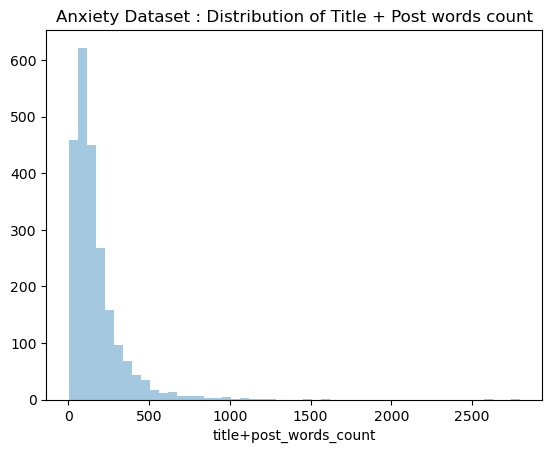

In [45]:
#Distribution of the post length
plt.title('Anxiety Dataset : Distribution of Title + Post words count')
sns.distplot(df_anxiety["title+post_words_count"],kde=False)

It is observed that the plot is right-skewed distribution. It might be from the [start-up effects.](https://www.itl.nist.gov/div898/handbook/eda/section3/histogr6.htm)

In [46]:
#look at the shortest and longest length counts with the "title+selftext_all_clean"

#Shortest length
display(df_anxiety.sort_values(by="title+text_length",ascending=True)[["title+selftext_lemmatizing"]].head(5))

#Longest length
display(df_anxiety.sort_values(by="title+text_length",ascending=False)[["title+selftext_lemmatizing"]].head(5))

,title+selftext_lemmatizing
216,feel 90 betterThe fact It miracle alive planet...
1348,Fuck extrasystole I used cry quite often like ...
1810,Is brain autopilot And way around I felt way l...
1211,gonna killI always pushing friend around talki...
1253,VentingI 25 year old male long remember proble...


,title+selftext_lemmatizing
1178,What happened wish anyone cared wish truly lov...
2569,Is This Burn Out Sometimes I envision ideal li...
2776,First time 18 year life I ve opened This Disc...
486,fear mental illnessJust wanted see caregiver s...
2273,Anxiety change I ve aged recently flare contam...


This is to give a overview of the shortest and longest words. It is observed that the title+text_length and title+post_words_count are closely similar.

<AxesSubplot:title={'center':'Depression Dataset : Distribution of Title + Text length'}, xlabel='title+text_length'>

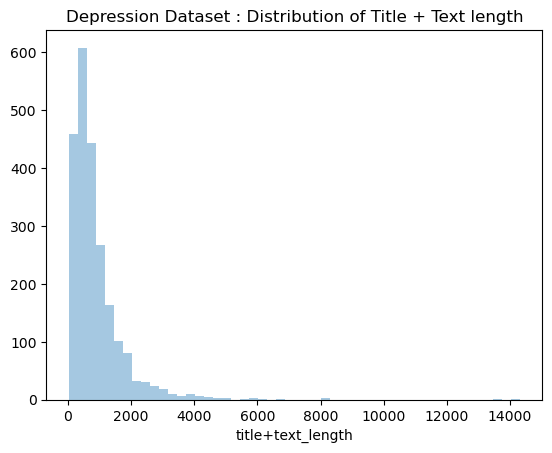

In [47]:
#Distribution of the total length
plt.title('Depression Dataset : Distribution of Title + Text length')
sns.distplot(df_anxiety["title+text_length"],kde=False)

It is observed that the plot is right-skewed distribution. It might be from the [start-up effects.](https://www.itl.nist.gov/div898/handbook/eda/section3/histogr6.htm)

#### Word Count

In [48]:
#Use of CountVectorizer to check for words
cv = CountVectorizer(stop_words=stopwords, min_df=3)
cv.fit(df_anxiety["title+selftext_lemmatizing"])

status_anxiety_cv = cv.transform(df_anxiety["title+selftext_lemmatizing"])
status_anxiety_df = pd.DataFrame(status_anxiety_cv.todense(), columns=cv.get_feature_names())

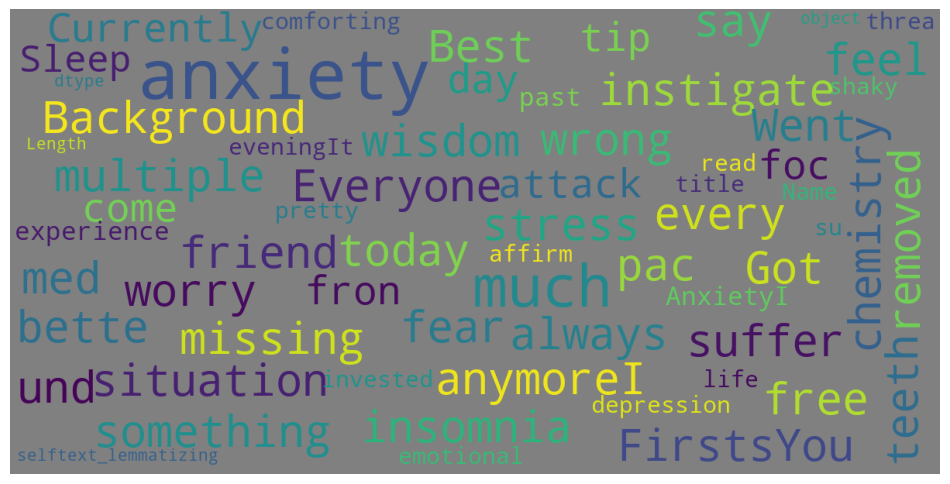

In [49]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
        background_color="gray",
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

wordcloud=wordcloud.generate(str(df_anxiety["title+selftext_lemmatizing"]))
    
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [50]:
#show 5 most common words
status_anxiety_df.sum().sort_values(ascending=False).head(5)

feel    2919
want    1954
know    1885
life    1764
time    1635
dtype: int64

<AxesSubplot:title={'center':'Anxiety Dataset : Top 5 common 1-word'}>

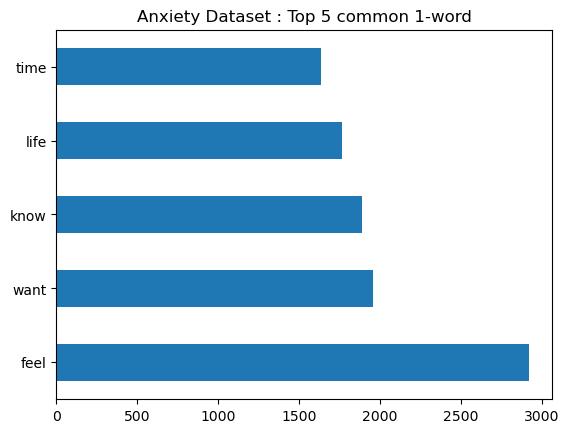

In [51]:
#show in bar chart form
plt.title('Anxiety Dataset : Top 5 common 1-word')
status_anxiety_df.sum().sort_values(ascending=False).head(5).plot(kind='barh')

It is observed that the 20 most common words makes no sense and it is very similar with depression reddit.

In [52]:
#show bigrams
cv_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv_bigrams.fit(df_anxiety["title+selftext_lemmatizing"].dropna())

bigrams_anxiety_cv = cv_bigrams.transform(df_anxiety["title+selftext_lemmatizing"].dropna())
bigrams_anxiety_df = pd.DataFrame(bigrams_anxiety_cv.todense(), columns=cv_bigrams.get_feature_names())

bigrams_anxiety_df.sum().sort_values(ascending=False).head(5)

feel like        1039
make feel         192
mental health     132
high school       108
year old          102
dtype: int64

<AxesSubplot:title={'center':'Anxiety Dataset : Top 5 common 12-word'}>

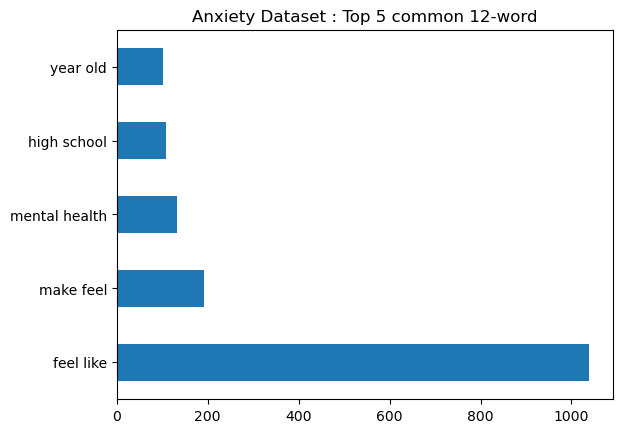

In [53]:
#show in bigrams bar chart form
plt.title('Anxiety Dataset : Top 5 common 12-word')
bigrams_anxiety_df.sum().sort_values(ascending=False).head(5).plot(kind='barh')

It is observed that most anxious people wants to communicate on how they feel and it is very similar with depression reddit.

In [54]:
#show trigrams
cv_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english')
cv_trigrams.fit(df_anxiety["title+selftext_lemmatizing"].dropna())

trigrams_anxiety_cv = cv_trigrams.transform(df_anxiety["title+selftext_lemmatizing"].dropna())
trigrams_anxiety_df = pd.DataFrame(trigrams_anxiety_cv.todense(), columns=cv_trigrams.get_feature_names())

trigrams_anxiety_df.sum().sort_values(ascending=False).head(5)

make feel better    34
make feel like      27
feel like going     26
life feel like      23
know feel like      23
dtype: int64

<AxesSubplot:title={'center':'Anxiety Dataset : Top 5 common 3-word'}>

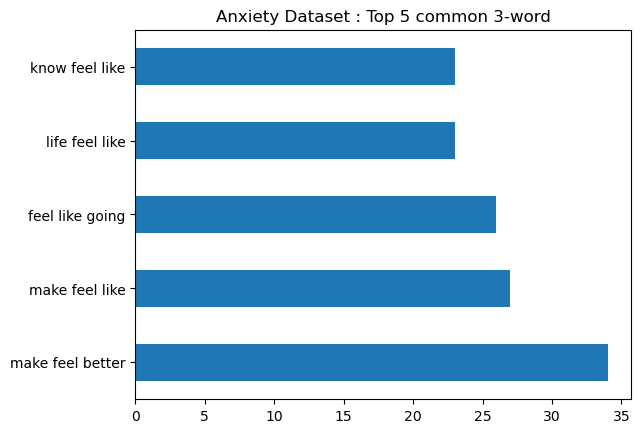

In [55]:
#show in trigrams bar chart form
plt.title('Anxiety Dataset : Top 5 common 3-word')
trigrams_anxiety_df.sum().sort_values(ascending=False).head(5).plot(kind='barh')

Similar to the point made above, it is observed that alot of anxious people wants to communicate on how they feel on the reddit. There is a possible that they want [to be heard.](https://www.healthline.com/health/high-functioning-anxiety-want-you-to-know#6.-I-just-want-to-be-heard.) It is slightly different from the depressed people where they want a listening ear.

#### Compare graphs between both datasets

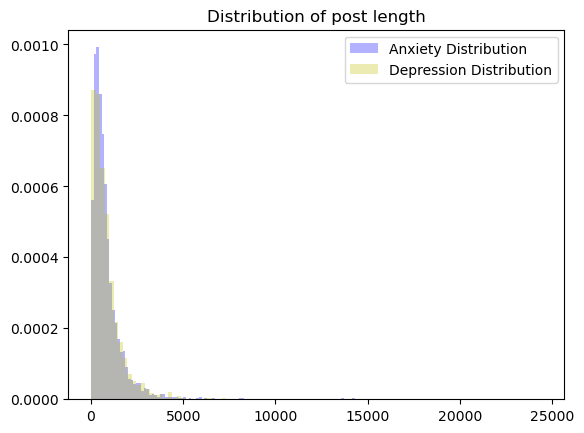

In [56]:
#Compare Distribution of the post length
plt.title("Distribution of post length")
plt.hist(df_anxiety["post_length"],bins=100,alpha=0.3,color="b", label="Anxiety Distribution",density=True)
plt.hist(df_depress["post_length"],bins=100,alpha=0.3,color="y", label="Depression Distribution",density=True)
plt.legend()

It is observed that anxious people tends to have more post length than depress people.

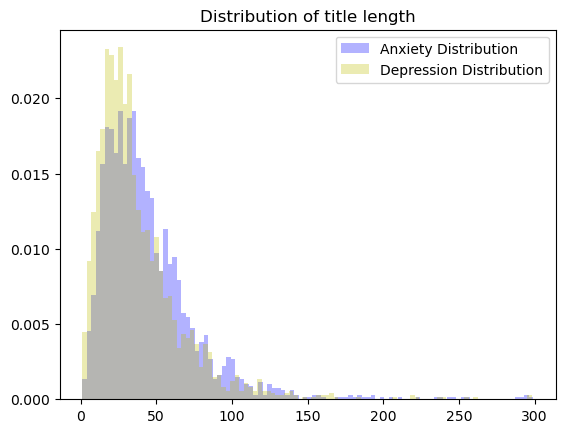

In [57]:
#Compare Distribution of the title length
plt.title("Distribution of title length")
plt.hist(df_anxiety["title_length"],bins=100,alpha=0.3,color="b", label="Anxiety Distribution",density=True)
plt.hist(df_depress["title_length"],bins=100,alpha=0.3,color="y", label="Depression Distribution",density=True)
plt.legend()

It is observed that depressed people tends to have more title length than anxious people.

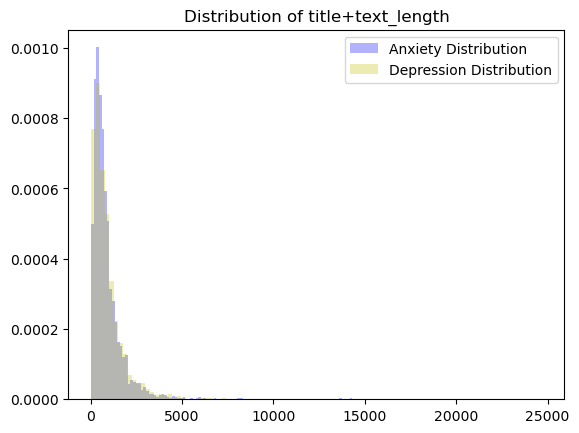

In [58]:
#Compare Distribution of the title length
plt.title("Distribution of title+text_length")
plt.hist(df_anxiety["title+text_length"],bins=100,alpha=0.3,color="b", label="Anxiety Distribution",density=True)
plt.hist(df_depress["title+text_length"],bins=100,alpha=0.3,color="y", label="Depression Distribution",density=True)
plt.legend()

It is observed that overall, anxious people tends to have more title and text length than depressed people.

# Combine dataset together

In [59]:
result = pd.concat([df_depress,df_anxiety])
result.head()

,subreddit,selftext_clean,title_clean,text_n_stopwords,title_n_stopwords,text_lemmatizing,title_lemmatizing,title+selftext_all_clean,title+selftext_n_stopwords,title+selftext_lemmatizing,target,post_length,title_length,title+text_length,post_words_count,title_words_count,title+post_words_count
0,depression,I dunno I'm posting here cuz I think I'm havin...,drunk confused and depressed?,i dunno im posting here cuz i think im having ...,drunk confused and depressed,I dunno I posting cuz I think I episode hard t...,drunk confused depressed,drunk confused and depressed?I dunno I'm posti...,drunk confused and depressedi dunno im posting...,drunk confused depressed I dunno I posting cuz...,0,585,29,614,113,4,116
1,depression,You ever feel like something is wrong with you...,Question,you ever feel like something is wrong with you...,question,You ever feel like something wrong everyday ma...,Question,QuestionYou ever feel like something is wrong ...,questionyou ever feel like something is wrong ...,QuestionYou ever feel like something wrong eve...,0,114,8,122,23,1,23
2,depression,I have multiple chemistry packets due tonight ...,Cant get homework done,i have multiple chemistry packets due tonight ...,cant get homework done,I multiple chemistry packet due tonight test g...,Cant get homework done,Cant get homework doneI have multiple chemistr...,cant get homework donei have multiple chemistr...,Cant get homework doneI multiple chemistry pac...,0,452,22,474,84,4,87
3,depression,I would be free of this situation i’m in I wou...,I think I would be happier if my family forgot...,i would be free of this situation i’m in i wou...,i think i would be happier if my family forgot...,I would free situation I would free manipulati...,I think I would happier family forgot,I think I would be happier if my family forgot...,i think i would be happier if my family forgot...,I think I would happier family forgotI would f...,0,462,55,517,96,12,107
6,depression,Background: Been diagnosed with depression anx...,Sleeping too much. Advice?,background been diagnosed with depression anxi...,sleeping too much advice,Background Been diagnosed depression anxiety d...,Sleeping much Advice,Sleeping too much. Advice?Background: Been dia...,sleeping too much advicebackground been diagno...,Sleeping much Advice Background Been diagnosed...,0,941,26,967,180,4,183


In [60]:
#Choose the data columns for modeling
cols=result.columns
cols
mresult=result[["target","title+selftext_n_stopwords","title+selftext_lemmatizing","title+selftext_all_clean","title_lemmatizing","text_lemmatizing"]]
display(mresult)
mresult=mresult.dropna()
display(mresult.shape)

,target,title+selftext_n_stopwords,title+selftext_lemmatizing,title+selftext_all_clean,title_lemmatizing,text_lemmatizing
0,0,drunk confused and depressedi dunno im posting...,drunk confused depressed I dunno I posting cuz...,drunk confused and depressed?I dunno I'm posti...,drunk confused depressed,I dunno I posting cuz I think I episode hard t...
1,0,questionyou ever feel like something is wrong ...,QuestionYou ever feel like something wrong eve...,QuestionYou ever feel like something is wrong ...,Question,You ever feel like something wrong everyday ma...
2,0,cant get homework donei have multiple chemistr...,Cant get homework doneI multiple chemistry pac...,Cant get homework doneI have multiple chemistr...,Cant get homework done,I multiple chemistry packet due tonight test g...
3,0,i think i would be happier if my family forgot...,I think I would happier family forgotI would f...,I think I would be happier if my family forgot...,I think I would happier family forgot,I would free situation I would free manipulati...
6,0,sleeping too much advicebackground been diagno...,Sleeping much Advice Background Been diagnosed...,Sleeping too much. Advice?Background: Been dia...,Sleeping much Advice,Background Been diagnosed depression anxiety d...
...,...,...,...,...,...,...
3070,1,got my wisdom teeth removed today went much be...,Got wisdom teeth removed today Went much bette...,Got my wisdom teeth removed today. Went much b...,Got wisdom teeth removed today Went much bette...,Trying figure s go anxiety sufferer I don t wa...
3072,1,currently on a anxiety attack come down fron t...,Currently anxiety attack come fron day tip foc...,Currently on a anxiety attack come down fron t...,Currently anxiety attack come fron day tip foc...,I upset stomach triggered yesterday getting be...
3074,1,sleep anxietywoke up 2am again and freaking ou...,Sleep AnxietyI past experience depression I su...,Sleep AnxietyWoke up 2am again and freaking ou...,Sleep Anxiety,Woke 2am freaking sound outside I hear sitting...
3075,1,anxiety only in the eveningfrom googling i can...,Anxiety eveningIt pretty comforting read threa...,Anxiety only in the eveningFrom googling I can...,Anxiety evening,From googling I see fairly common I m wonderin...


(4769, 6)

In [61]:
mresult["text_lemmatizing"].info

<bound method Series.info of 0       I dunno I posting cuz I think I episode hard t...
1       You ever feel like something wrong everyday ma...
2       I multiple chemistry packet due tonight test g...
3       I would free situation I would free manipulati...
6       Background Been diagnosed depression anxiety d...
                              ...                        
3070    Trying figure s go anxiety sufferer I don t wa...
3072    I upset stomach triggered yesterday getting be...
3074    Woke 2am freaking sound outside I hear sitting...
3075    From googling I see fairly common I m wonderin...
3076    I found I became people pleaser I don t bugged...
Name: text_lemmatizing, Length: 4769, dtype: object>

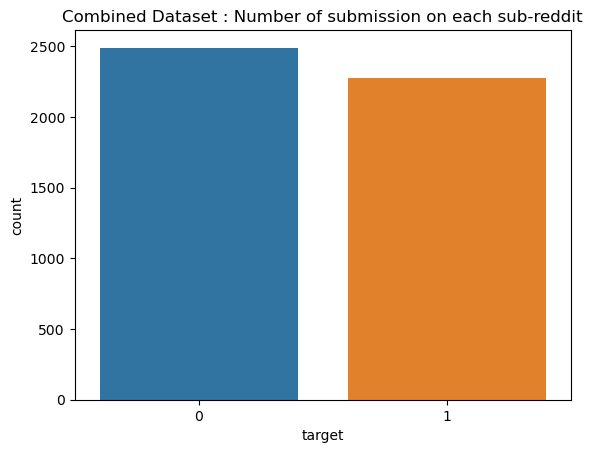

In [62]:
#Check the difference in the number of post from depression and anxiety
plt.title('Combined Dataset : Number of submission on each sub-reddit')
sns.countplot(x='target', data=mresult);

From this data, where 0 and 1 represents depression dataset and anxious dataset respectively, it is observed that the sample size is not evenly distributed. Therefore, smote technique will be used after train test split to make both dataset evenly distributed.

In [63]:
result.to_csv('./00-datasets/combined_dataset.csv', index=False)

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**target**|int64|Depression and Anxiety|The target for the dataset where 0 is the depression dataset and 1 is the anxiety dataset. The purpose of this feature is for modeling the y variable.| 
|**title+selftext_n_stopwords**|object|Depression and Anxiety|The title and text with no stopwords. The purpose of this feature is for modeling the x variable compare which x variable gives a better accurate score.| 
|**title+selftext_lemmatizing**|object|Depression and Anxiety|The title and text that has been lemmantized. The purpose of this feature is for modeling the x variable compare which x variable gives a better accurate score.| 
|**title+selftext_all_clean**|object|Depression and Anxiety|The title and text that has been cleaned. The purpose of this feature is for modeling the x variable compare which x variable gives a better accurate score.| 
|**title_lemmatizing**|object|Depression and Anxiety|The title that has been lemmantized. The purpose of this feature is for modeling the x variable compare which x variable gives a better accurate score.| 
|**text_lemmatizing**|object|Depression and Anxiety|The text that has been lemmantized. The purpose of this feature is for modeling the x variable compare which x variable gives a better accurate score.| 

In [67]:
print("Part 2 of the notebook has been synchronized. \nPlease proceed to part 3 of the notebook. \nThank you for your patience.")

Part 2 of the notebook has been synchronized. 
Please proceed to part 3 of the notebook. 
Thank you for your patience.


To continue, please proceed to [part 3](./02-Code-Part-03.ipynb) of the notebook.